In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

iris = np.genfromtxt('iris_full.csv', delimiter=',', skip_header=1) 
X = iris[:, 0:4]
y = iris[:, 4]
y = y.astype('uint8')

# normalize
X = preprocessing.scale(X)

intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

D = 4 # dimensionality
K = 3 # number of classes

# initialize parameters randomly
theta = np.random.randn(D+1,K)

# gradient descent loop
num_examples = X.shape[0]
learning_rate = 0.1

losses = []
num_iter = 30

num_sample_stochastic = 1
for epoch in range(num_iter):
    for i in range(num_examples): 
        xi = X[i:i+1]
        xi = xi.T
        yi = y[i:i+1]
        
        # evaluate class scores
        scores = np.dot(theta.T, xi)
        
        #compute the class probabilities
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=0, keepdims=True)
        
        # compute the loss
        corect_logprobs = -np.log(probs[yi, range(num_sample_stochastic)])
        loss = np.sum(corect_logprobs)
        losses.append(loss)
                
        # compute the gradient on scores
        dscores = probs
        dscores[yi,0] -= 1
        
        # backpropate the gradient to the parameters (W,b)
        dtheta = np.dot(xi, dscores.T)

        # perform a parameter update
        theta += -learning_rate *dtheta

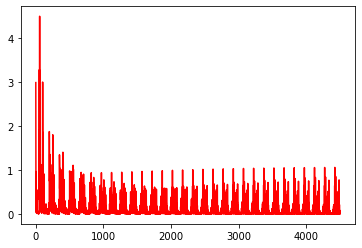

In [2]:
x_axis = range(len(losses))
plt.plot(x_axis,losses, color="r")
plt.show()

In [3]:
# evaluate training set accuracy
scores = np.dot(theta.T, X.T)
predicted_class = np.argmax(scores, axis=0)
print('Training accuracy: %.2f' % (np.mean(predicted_class == y)))

Training accuracy: 0.97
